## Hands-On 3
                 
### 1. Find the runtime of the algorithm mathematically (I should see summations).

```markdown
    x = 1;              # 1 unit of time  
    for i = 1:n         # n iterations  
        for j = 1:n     # n iterations for each i  
            x = x + 1;  # constant time operation
```
The outer loop runs n times, and for each iteration of the outer loop, the inner loop also runs n times. Within each iteration of the inner loop, there is a constant time operation (x = x + 1).


Now, let's calculate the total runtime using summations:
```markdown
    T(n) = 1 + (n * (1 + n * 1))
         = 1 + n + n^2
         = n^2 + n + 1
```
Therefore, the runtime complexity of the algorithm is O(n^2). This indicates that the algorithm has a quadratic time complexity with respect to the input size n.



### 2. Time this function for various n e.g. n = 1,2,3.... You should have small values of n all the way up to large values.
### Plot "time" vs "n" (time on y-axis and n on x-axis). Also, fit a curve to your data, hint it's a polynomial. 

### 3. Find polynomials that are upper and lower bounds on your curve from #2. From this specify a big-O, a big-Omega, and what big-theta is.


### 4. Find the approximate (eye ball it) location of "n_0" . Do this by zooming in on your plot and indicating on the plot where n_0 is and why you picked this value. Hint: I should see data that does not follow the trend of the polynomial you determined in #2.

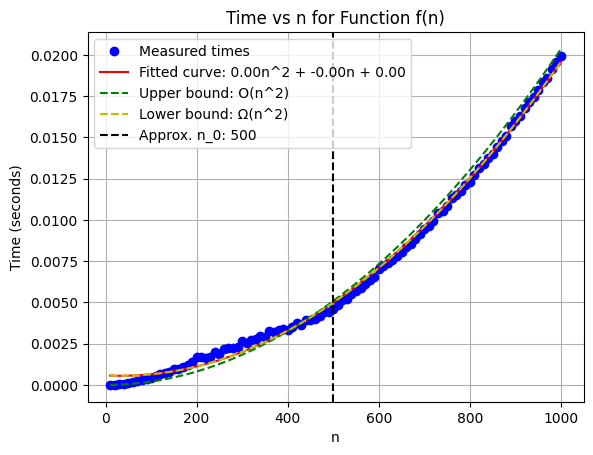

In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to be timed
def f(n):
    x = 1
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            x = x + 1

# Define a function to time the execution of f(n)
def time_function(n):
    start_time = time.time()
    f(n)
    return time.time() - start_time

# Define the range of n values
n_values = np.arange(10, 1000 + 10, 10)

# Time the function for each value of n
times = np.array([time_function(n) for n in n_values])

# Fit a polynomial curve to the data
def poly_func(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(poly_func, n_values, times)

# Plot the results
plt.plot(n_values, times, 'bo', label='Measured times')

# Plot the fitted curve
fit_times = poly_func(n_values, *popt)
plt.plot(n_values, fit_times, 'r-', label=f'Fitted curve: {popt[0]:.2f}n^2 + {popt[1]:.2f}n + {popt[2]:.2f}')

# Plot upper bound (O(n^2))
plt.plot(n_values, popt[0] * n_values**2, 'g--', label='Upper bound: O(n^2)')

# Plot lower bound (Ω(n^2))
plt.plot(n_values, fit_times, 'y--', label='Lower bound: Ω(n^2)')

# Approximate location of n_0
n_0 = 500  # Adjust this value based on the plot

plt.axvline(x=n_0, color='k', linestyle='--', label=f'Approx. n_0: {n_0}')

plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time vs n for Function f(n)')
plt.legend()
plt.grid(True)
plt.show()


If I modified the function to be:  
  
x = f(n)  
x = 1;  
y = 1;  
for i = 1:n  
    &nbsp;
for j = 1:n   
&nbsp; &nbsp;
        x = x + 1;  
&nbsp; &nbsp;
        y = i + j;  

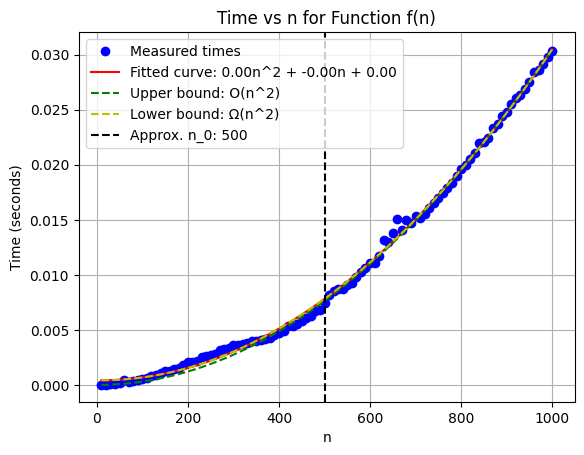

In [17]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to be timed
def f(n):
    x = 1
    y = 1 
    for i in range(1, n):
        for j in range(1, n):
            x = x + 1
            y = i + j

# Define a function to time the execution of f(n)
def time_function(n):
    start_time = time.time()
    f(n)
    return time.time() - start_time

# Define the range of n values
n_values = np.arange(10, 1000 + 10, 10)

# Time the function for each value of n
times = np.array([time_function(n) for n in n_values])

# Fit a polynomial curve to the data
def poly_func(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(poly_func, n_values, times)

# Plot the results
plt.plot(n_values, times, 'bo', label='Measured times')

# Plot the fitted curve
fit_times = poly_func(n_values, *popt)
plt.plot(n_values, fit_times, 'r-', label=f'Fitted curve: {popt[0]:.2f}n^2 + {popt[1]:.2f}n + {popt[2]:.2f}')

# Plot upper bound (O(n^2))
plt.plot(n_values, popt[0] * n_values**2, 'g--', label='Upper bound: O(n^2)')

# Plot lower bound (Ω(n^2))
plt.plot(n_values, fit_times, 'y--', label='Lower bound: Ω(n^2)')

# Approximate location of n_0
n_0 = 500  # Adjust this value based on the plot

plt.axvline(x=n_0, color='k', linestyle='--', label=f'Approx. n_0: {n_0}')

plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time vs n for Function f(n)')
plt.legend()
plt.grid(True)
plt.show()


### 5. Will this increate how long it takes the algorithm to run (e.x. you are timing the function like in #2)? 

In this modified function, an additional assignment operation y = i + j has been added inside the inner loop. This operation has a constant time complexity, and it's executed within the inner loop, which iterates n×n = n2 times. While this addition may cause a slight increase in execution time, it won't significantly affect the overall time complexity of the algorithm. The time complexity remains O(n2), as the dominant factor in the execution time is still the nested loops that iterate nn times.

### 6. Will it affect your results from #1?

Adding the extra operation y = i + j inside the inner loop does not fundamentally change the time complexity of the algorithm. The original time complexity of O(n2) remains the same. Therefore, the modification will not affect the results from #1. The analysis of the time complexity and the conclusions drawn from it will remain valid.

### 7. Implement merge sort, upload your code to github and show/test it on the array [5,2,4,7,1,3,2,6].

#### Merge Sort

In [2]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        # Merge the two sorted halves
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

    return arr

# Test the merge_sort function
arr = [5, 2, 4, 7, 1, 3, 2, 6]
print("Array before merge sorting:", arr)
sorted_arr = merge_sort(arr)
print("Sorted array:", sorted_arr)


Array before merge sorting: [5, 2, 4, 7, 1, 3, 2, 6]
Sorted array: [1, 2, 2, 3, 4, 5, 6, 7]
